In [1]:
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"]="0,3"  # specify which GPU(s) to be used
#os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used   gpu 0 only

# nvidia auslastung
# watch -n 1 nvidia-smi



#import tensorflow as tf
import keras
keras.__version__

##%%
#from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3

from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks
from keras.callbacks import ModelCheckpoint




conv_base =  InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3), classes=1000)



conv_base.summary()





img_rows, img_cols = 150, 150
img_channels = 3

batch_size = 20

batch_size_Tatal_sample_size = int((4000) / batch_size) 

print('batch_size_Tatal_sample_size:  ', batch_size_Tatal_sample_size)


nb_epoch =  300# 150



#base_dir = '/media/ssd/Windows7_1/1_ssd_m.2/PetImages'
base_dir = 'I:\\1_ssd_m.2\\PetImages'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation') 


#base_dir = '/home/ssd/a_cnn/TEST_2000'

#validation_dir = os.path.join(base_dir, 'test')

print("Finished dir read")


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


print(" ")

print("class_indices")
print(train_generator.class_indices)

Using TensorFlow backend.


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

Found 2000 images belonging to 2 classes.
 
class_indices
{'Cat': 0, 'Dog': 1}


In [2]:
from keras import models
from keras import layers



#################### in v3

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# add a global spatial average pooling layer
x = conv_base.output

x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout (0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout (0.5)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
#predictions = Dense(1, activation='sigmoid')(x) 
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=conv_base.input, outputs=predictions)





print(" ")
print(" ")


print("class_indices")
print(train_generator.class_indices)

 
 
 
 
class_indices
{'Cat': 0, 'Dog': 1}
 


In [3]:
 
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=batch_size_Tatal_sample_size,
      epochs=nb_epoch,
      callbacks=[ModelCheckpoint("F:\\petsTF20model_weights\\{val_acc:.4f}__{epoch:02d}-{val_loss:.2f}-{acc:.4f}_CatsVRDogs_4000_inceptionV3_softmaxP98_TF2.1win.h5", monitor="val_acc", save_best_only=True, mode='max')],
      validation_data=test_generator,
      validation_steps=20)



model.save('F:\\petsTF20model_weights\\CATSvsDOGS_4000_2000_inceptionV3_softmax_model.save98_TF2.1win.h5')



Epoch 1/300
200/200 [==============================] - 63s 313ms/step - loss: 0.6770 - acc: 0.5778 - val_loss: 0.2378 - val_acc: 0.8650
Epoch 2/300
200/200 [==============================] - 46s 232ms/step - loss: 0.5487 - acc: 0.7045 - val_loss: 0.3595 - val_acc: 0.9050
Epoch 3/300
200/200 [==============================] - 47s 235ms/step - loss: 0.4557 - acc: 0.7725 - val_loss: 0.3001 - val_acc: 0.9025
Epoch 4/300
200/200 [==============================] - 46s 231ms/step - loss: 0.3862 - acc: 0.8285 - val_loss: 0.2588 - val_acc: 0.9250
Epoch 5/300
200/200 [==============================] - 46s 230ms/step - loss: 0.3361 - acc: 0.8533 - val_loss: 0.2265 - val_acc: 0.9100
Epoch 6/300
200/200 [==============================] - 45s 226ms/step - loss: 0.3184 - acc: 0.8622 - val_loss: 0.4344 - val_acc: 0.9250
Epoch 7/300
200/200 [==============================] - 45s 227ms/step - loss: 0.2663 - acc: 0.8955 - val_loss: 0.0294 - val_acc: 0.9675
Epoch 8/300
200/200 [===========================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



200/200 [==============================] - 45s 223ms/step - loss: 0.0396 - acc: 0.9905 - val_loss: 6.5378e-04 - val_acc: 0.9725
Epoch 81/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0384 - acc: 0.9937 - val_loss: 6.4167e-04 - val_acc: 0.9650
Epoch 82/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0371 - acc: 0.9900 - val_loss: 3.8743e-07 - val_acc: 0.9750
Epoch 83/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0318 - acc: 0.9920 - val_loss: 0.0012 - val_acc: 0.9650
Epoch 84/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0384 - acc: 0.9890 - val_loss: 0.5082 - val_acc: 0.9675
Epoch 85/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0330 - acc: 0.9912 - val_loss: 0.3667 - val_acc: 0.9750
Epoch 86/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0350 - acc: 0.9910 - val_loss: 1.1550 - val_acc: 0.9675
Epoch 87/300
200/200 [====================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



200/200 [==============================] - 45s 223ms/step - loss: 0.0200 - acc: 0.9942 - val_loss: 6.6761e-04 - val_acc: 0.9825
Epoch 124/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0222 - acc: 0.9948 - val_loss: 9.5180e-06 - val_acc: 0.9725
Epoch 125/300
200/200 [==============================] - 45s 227ms/step - loss: 0.0186 - acc: 0.9950 - val_loss: 5.9605e-09 - val_acc: 0.9725
Epoch 126/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0236 - acc: 0.9948 - val_loss: 0.1592 - val_acc: 0.9825
Epoch 127/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0269 - acc: 0.9935 - val_loss: 4.5801e-04 - val_acc: 0.9775
Epoch 128/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0301 - acc: 0.9942 - val_loss: 0.4184 - val_acc: 0.9850
Epoch 129/300
200/200 [==============================] - 45s 223ms/step - loss: 0.0258 - acc: 0.9935 - val_loss: 0.0000e+00 - val_acc: 0.9675
Epoch 130/300
200/200 [=====

200/200 [==============================] - 45s 226ms/step - loss: 0.0118 - acc: 0.9970 - val_loss: 2.6599 - val_acc: 0.9750
Epoch 244/300
200/200 [==============================] - 45s 226ms/step - loss: 0.0069 - acc: 0.9980 - val_loss: 2.9289 - val_acc: 0.9725
Epoch 245/300
200/200 [==============================] - 45s 227ms/step - loss: 0.0045 - acc: 0.9990 - val_loss: 0.3266 - val_acc: 0.9650
Epoch 246/300
200/200 [==============================] - 46s 228ms/step - loss: 0.0221 - acc: 0.9975 - val_loss: 9.2426e-04 - val_acc: 0.9800
Epoch 247/300
200/200 [==============================] - 45s 227ms/step - loss: 0.0322 - acc: 0.9975 - val_loss: 1.8840 - val_acc: 0.9650
Epoch 248/300
200/200 [==============================] - 45s 227ms/step - loss: 0.0128 - acc: 0.9980 - val_loss: 0.0651 - val_acc: 0.9800
Epoch 249/300
200/200 [==============================] - 45s 227ms/step - loss: 0.0287 - acc: 0.9983 - val_loss: 0.0015 - val_acc: 0.9775
Epoch 250/300
200/200 [=====================

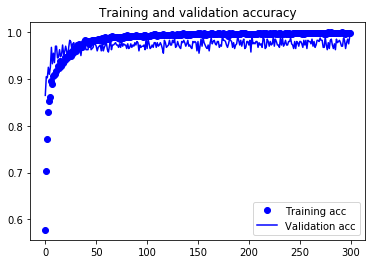

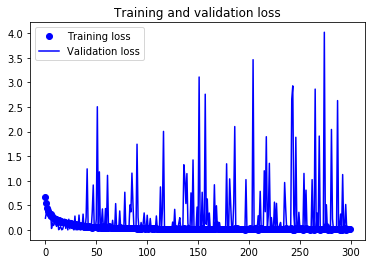

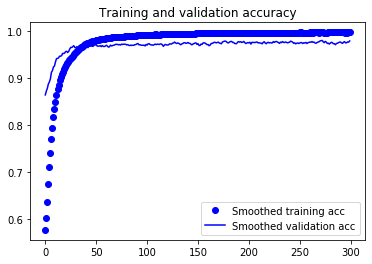

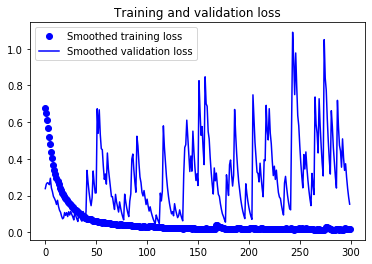

In [4]:
#%%


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()





def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#%%


